In [265]:

%matplotlib inline
# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from itertools import groupby
import datetime
import statistics
from datetime import datetime
from datetime import timedelta
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression
from statsmodels.regression.quantile_regression import QuantReg 

In [10]:
### Exchange rate CLP/USD

with open('CUR-CLP.csv', 'rt') as f:
    clp = list(csv.reader(f))
print (clp[0])
print (clp[1])
print(len(clp))
print(clp[len(clp)-1])


['DATE', 'RATE']
['2016-01-30', '712.676103']
5714
['2000-05-31', '524.2379']


In [12]:
### Copper, high grade: Comex spot price USD per lb.
with open('WSJ-COPPER.csv', 'rt') as f:
    copper = list(csv.reader(f))
print (copper[0])
print (copper[1])
print (len(copper))
print(copper[len(copper)-1])

['Date', 'Value']
['2016-01-29', '2.064']
2212
['2007-05-01', '3.605']


In [23]:
print(copper[5])

['2016-01-25', '1.9955']


In [42]:
p_clp = {}
for day in clp:
    try:
        date = (datetime.strptime(day[0], '%Y-%m-%d'))
        p_clp.update({date:float(day[1])})
    except ValueError:
        pass



In [43]:
p_copper = {}
for day in copper:
    try:
        date = (datetime.strptime(day[0], '%Y-%m-%d'))
        p_copper.update({date:float(day[1])})
    except ValueError:
        pass
    

In [321]:
prices = {}
for day in p_clp:
    if day in p_copper:
        prices[day]={"usd_per_1000clp":1/p_clp[day]*1000, "usd_per_lb_copper": p_copper[day] }
        

In [322]:
print (len(prices))

2208


In [323]:
print (list(prices.values())[100])
print (list(prices.keys())[100])

{'usd_per_1000clp': 1.8048427081113998, 'usd_per_lb_copper': 3.0305}
2014-06-13 00:00:00


In [136]:

records = []
for day in prices:
    x = prices[day]['usd_per_1000clp']
    y = prices[day]['usd_per_lb_copper']
    date = datetime.date(day)
    year = datetime.date(day).year
    month = datetime.date(day).month   
    d = datetime.date(day).day
    records.append((date,year,month,d,x,y))
records= sorted(records, key = lambda record : record[0])
data = pd.DataFrame(records, columns=['date', 'year','month','day','usd_per_1000clp','usd_per_lb_copper']) 

In [137]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [138]:
sns.set_style("darkgrid", {'xtick.major.size': 1.0,'ytick.major.size': 1.0 })

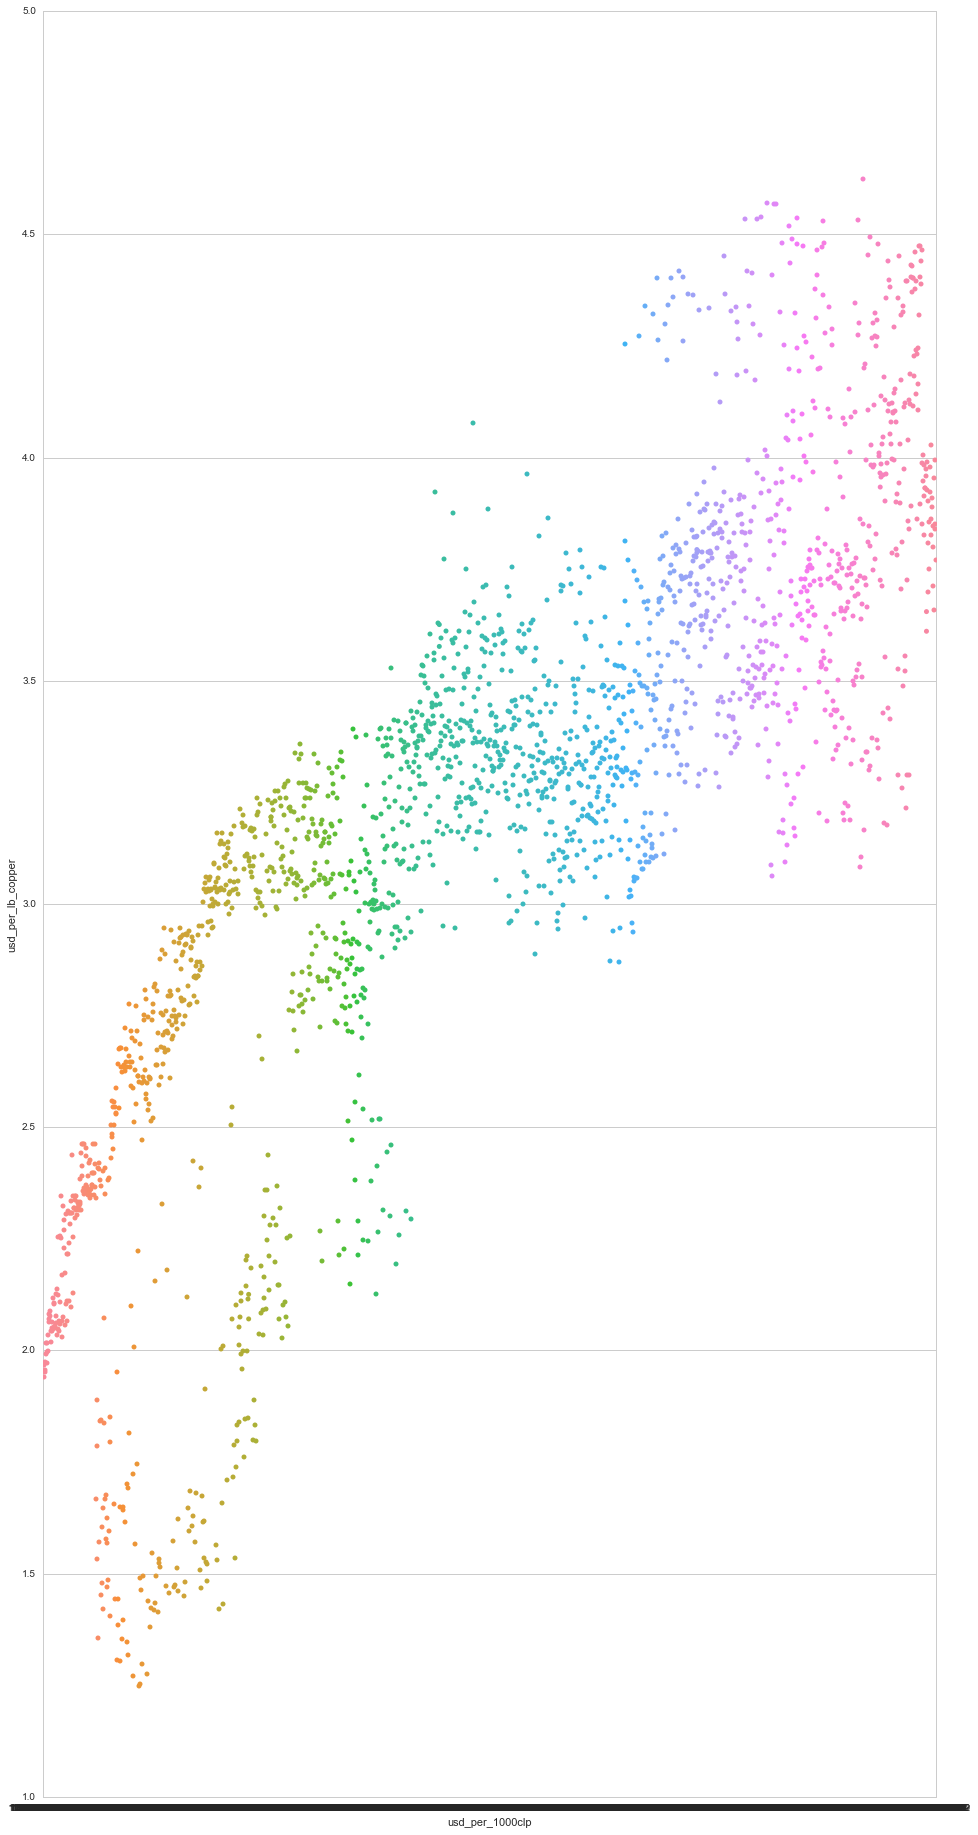

In [86]:
sns.set(style="whitegrid", color_codes=True)
dims = (16, 32)
fig, ax = plt.subplots(figsize=dims)
##sns.stripplot(x='usd_per_1000clp', y='usd_per_lb_copper', data=data, jitter=True, size=10,ax=ax)
##sns.stripplot(x='usd_per_1000clp', y='usd_per_lb_copper', data=data,ax=ax)
##plt.savefig("output.png")

In [139]:
print (len(data))

2208


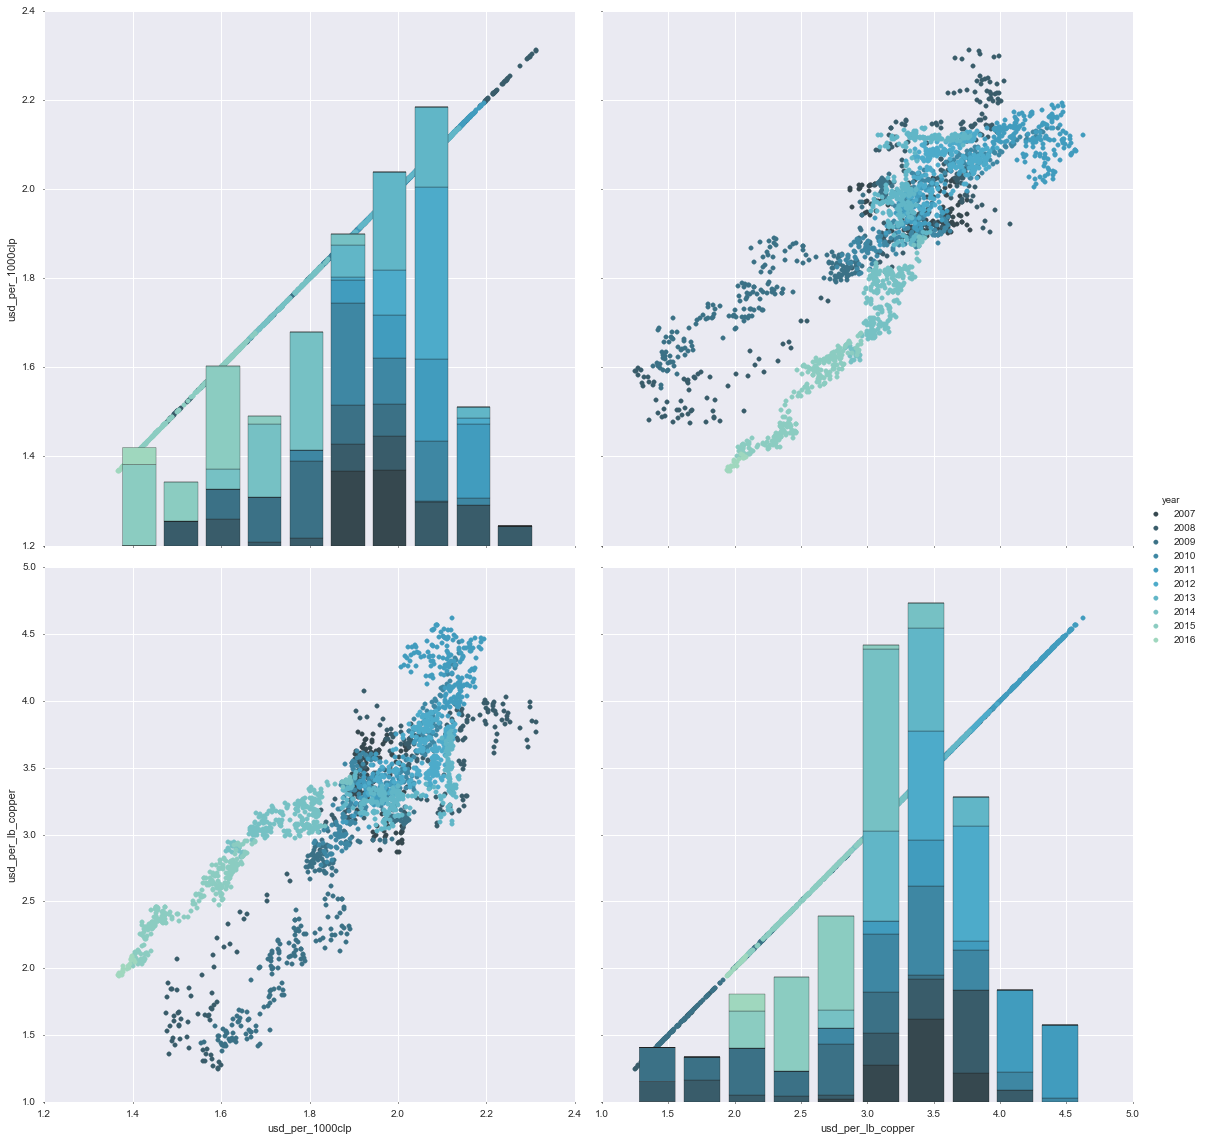

In [179]:
g = sns.PairGrid(data, vars=["usd_per_1000clp", 'usd_per_lb_copper'], hue="year", size=8, palette="GnBu_d")
g.map_diag(plt.hist)
g.map(plt.scatter)
g.add_legend();

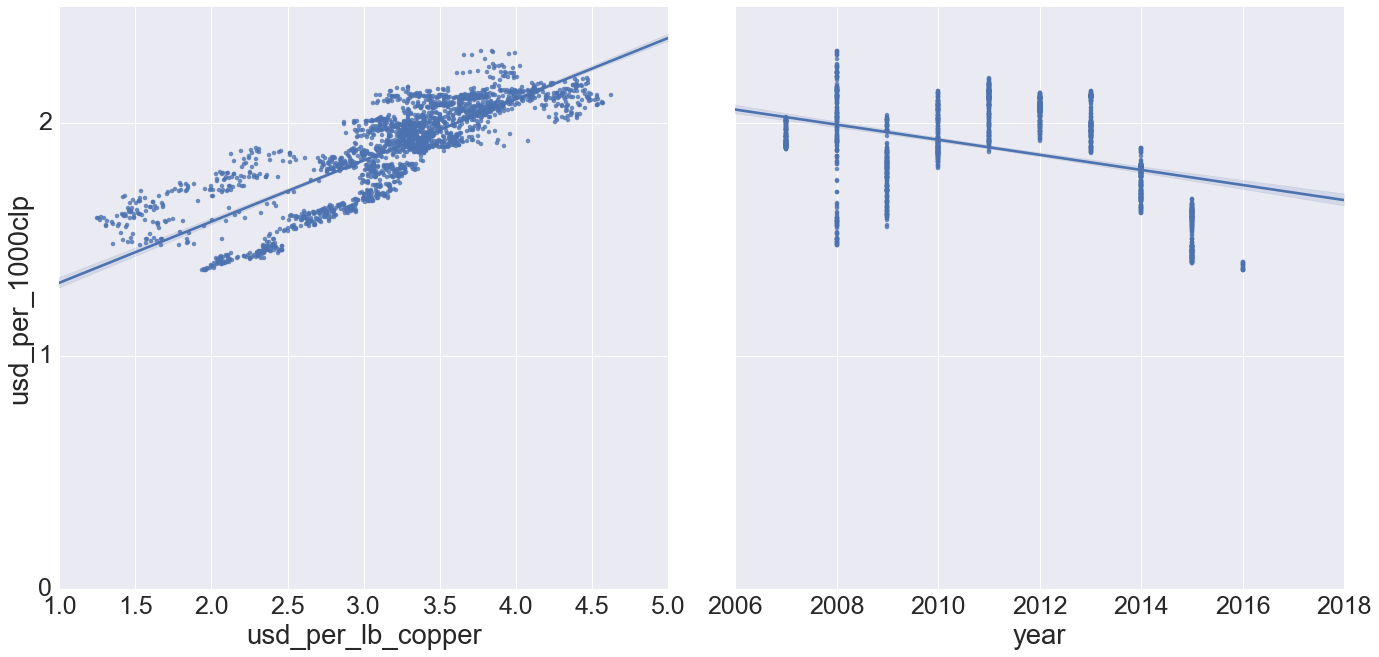

In [233]:
g = sns.PairGrid(data, y_vars=["usd_per_1000clp"], x_vars=["usd_per_lb_copper", 'year'], size=10, palette="Set2")
g.map(sns.regplot)
g.set(ylim=(0, 2.5), yticks=[0, 1,2,3 ]);

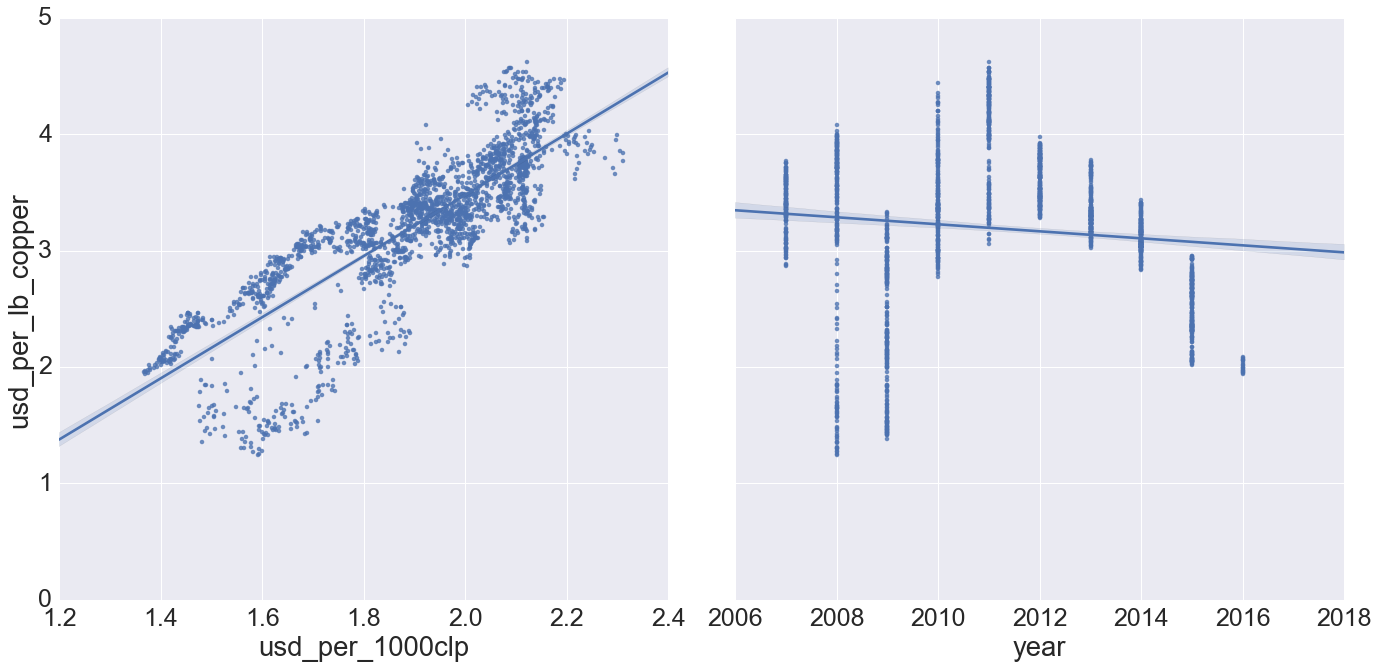

In [235]:
g = sns.PairGrid(data, y_vars=["usd_per_lb_copper"], x_vars=["usd_per_1000clp", 'year'], size=10, palette="Set2")
g.map(sns.regplot)
g.set(ylim=(0, 5), yticks=[0, 1,2,3,4,5 ]);

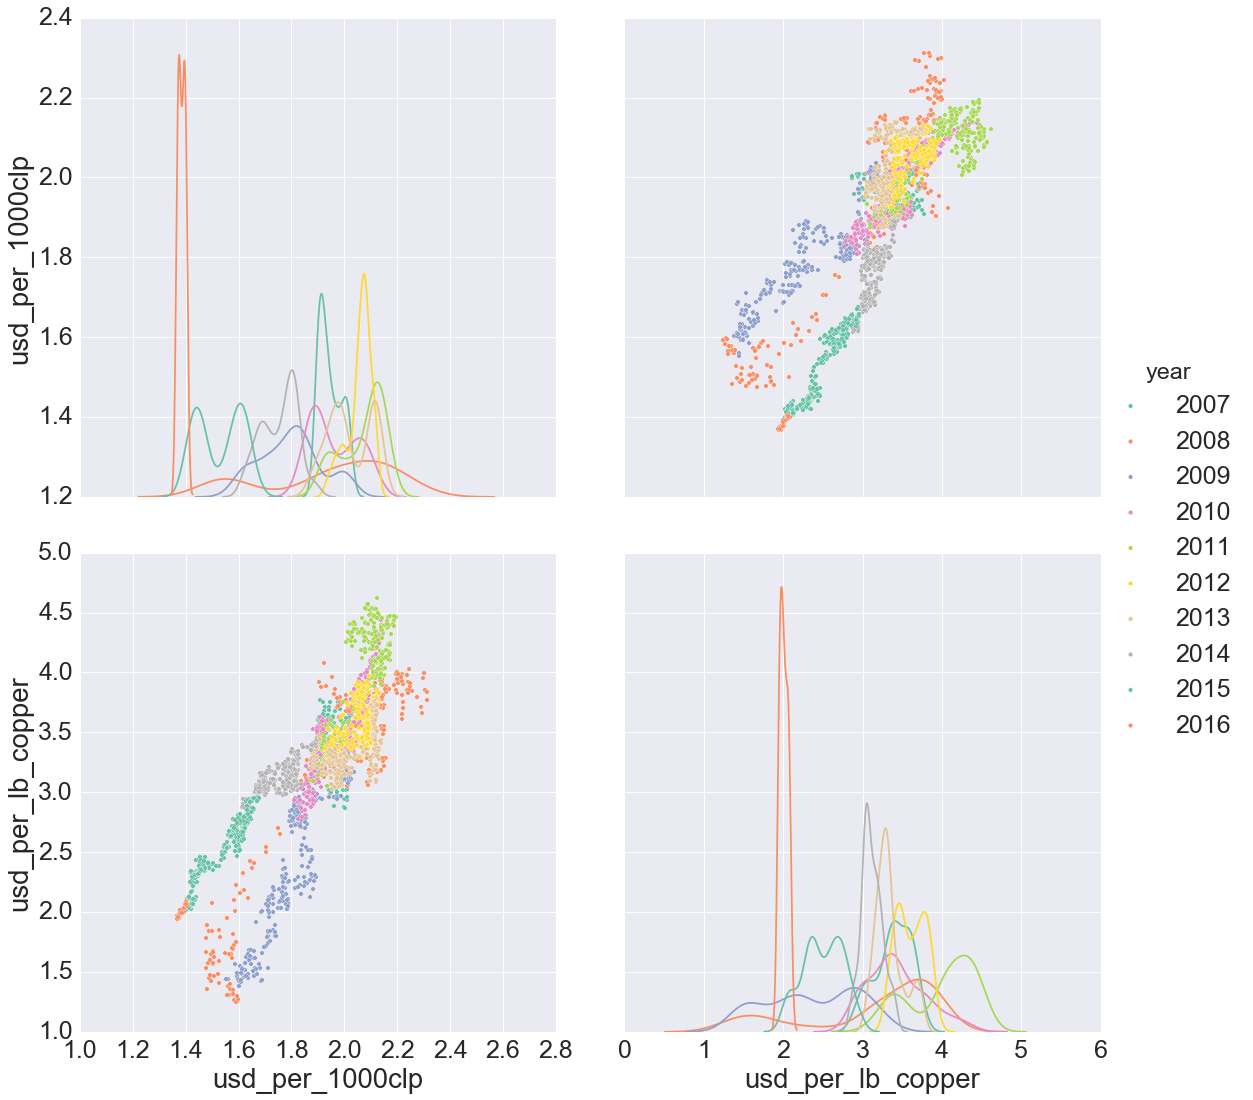

In [211]:
sns.set(font_scale=2.5)
g = sns.pairplot(data,  vars=["usd_per_1000clp", 'usd_per_lb_copper'], hue="year", palette="Set2", diag_kind="kde", size=8)

In [126]:
data_array = np.array(data)
print (data_array.shape)

(2208, 6)


In [120]:
print (data_array[2])

[datetime.date(2007, 5, 3) 2007 5 3 1.9090655238995349 3.772]


In [121]:
print (data_array[1])

[datetime.date(2007, 5, 2) 2007 5 2 1.9051096398884981 3.6285]


In [125]:
diff = data_array[2][0]-data_array[1][0]
print (diff)

1 day, 0:00:00


In [254]:
features_clp = ['cu_spot', 'clp_ex1', 'clp_ex2', 'clp_ex3', 'clp_ex4', 'clp_ex5',
                'cu_ex1', 'cu_ex2', 'cu_ex3', 'cu_ex4', 'cu_ex5', 'year','month' ]
features_cu = ['clp_spot', 'clp_ex1', 'clp_ex2', 'clp_ex3', 'clp_ex4', 'clp_ex5',
               'cu_ex1', 'cu_ex2', 'cu_ex3', 'cu_ex4', 'cu_ex5', 'year','month']
X_clp = np.zeros((len(data_array)-5, len(features_clp)))
X_cu = np.zeros((len(data_array)-5, len(features_cu)))
Y_clp = []
Y_cu = []


for i in range(5,len(data_array)):
    X_clp[i-5,0] = data_array[i,5]
    X_cu[i-5,0] = data_array[i,4]
    X_clp[i-5,11]= data_array[i,1]
    X_cu[i-5,11]= data_array[i,1]
    X_clp[i-5,12]= data_array[i,2]
    X_cu[i-5,12]= data_array[i,2]    
    for j in range (1,6):
        X_clp[i-5,j]= data_array[i-j,4]
        X_cu[i-5,j] = data_array[i-j,4]
    for j in range (6,11):
        X_clp[i-5,j]= data_array[i-j+5,5]
        X_cu[i-5,j] = data_array[i-j+5,5]
    Y_clp.append(data_array[i,4])
    Y_cu.append(data_array[i,5])

    
    

In [255]:
Y_clp = np.array(Y_clp)
Y_cu = np.array(Y_cu)
print (X_clp.shape)
print (Y_clp.shape)
print (X_cu.shape)
print (Y_cu.shape)

(2203, 13)
(2203,)
(2203, 13)
(2203,)


In [256]:
print (X_clp[0])

[  3.71550000e+00   1.92632814e+00   1.91928806e+00   1.90906552e+00
   1.90510964e+00   1.90210315e+00   3.71050000e+00   3.75050000e+00
   3.77200000e+00   3.62850000e+00   3.60500000e+00   2.00700000e+03
   5.00000000e+00]


In [257]:
print(data_array[5])

[datetime.date(2007, 5, 8) 2007 5 8 1.9277063915329982 3.7155]


In [258]:
print (Y_clp[0])

1.92770639153


In [259]:
print (X_cu[0])

[  1.92770639e+00   1.92632814e+00   1.91928806e+00   1.90906552e+00
   1.90510964e+00   1.90210315e+00   3.71050000e+00   3.75050000e+00
   3.77200000e+00   3.62850000e+00   3.60500000e+00   2.00700000e+03
   5.00000000e+00]


In [260]:
print (Y_cu[0])

3.7155


In [269]:
##Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X_clp.shape[0]))

X_clp, Y_clp, X_cu, Y_cu = X_clp[shuffle], Y_clp[shuffle], X_cu[shuffle], Y_cu[shuffle]

In [272]:
train_clp, train_labels_clp = X_clp[:1500,:], Y_clp[:1500]
test_clp, test_labels_clp = X_clp[1500:,:], Y_clp[1500:]
train_cu, train_labels_cu = X_cu[:1500,:], Y_cu[:1500]
test_cu, test_labels_cu = X_cu[1500:,:], Y_cu[1500:]

print (train_clp.shape, train_labels_clp.shape)
print (test_clp.shape, test_labels_clp.shape)

(1500, 13) (1500,)
(703, 13) (703,)


In [274]:
## fit linear regression model
def LinearRegressionFitAndPlot(X, Y):
    lm = LinearRegression()
    lm.fit(X, Y)
LinearRegressionFitAndPlot(train_clp, train_labels_clp)


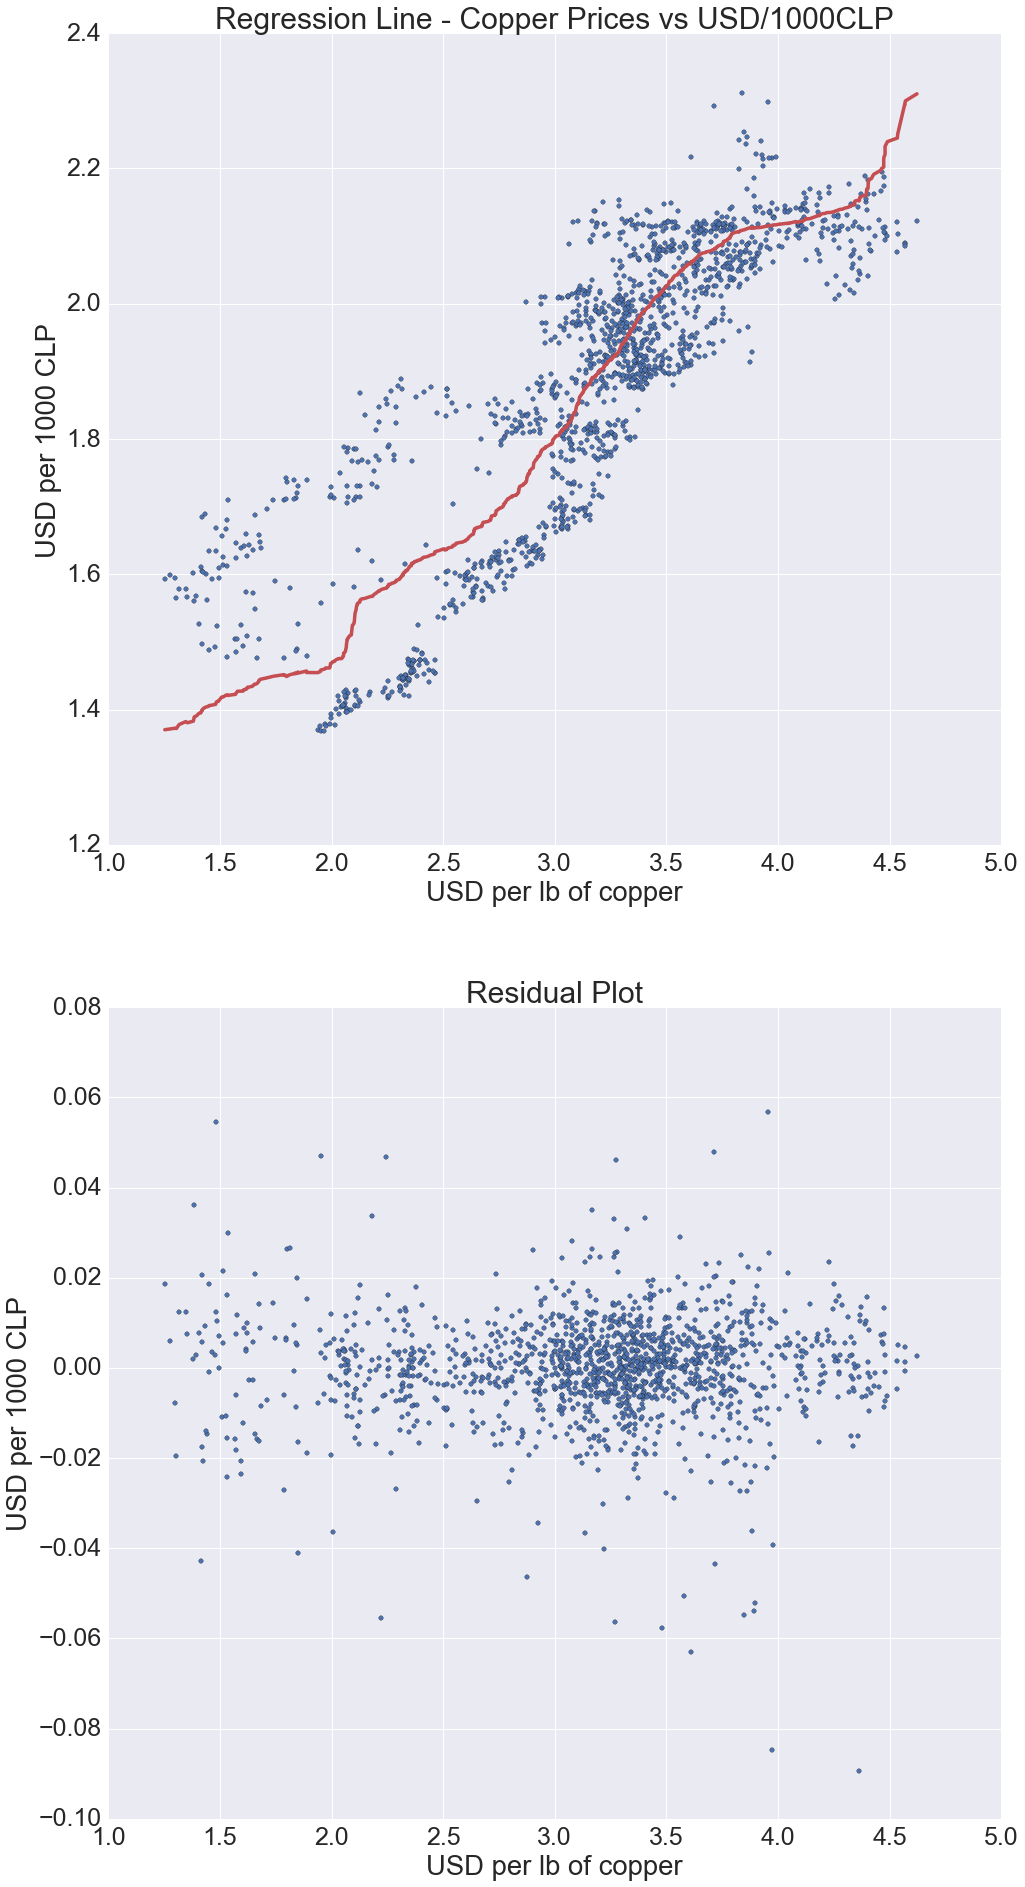

In [306]:

def PlotUnivariateFitAndResids(X, Y, preds, preds_sorted):

    dims = (16, 32)
    plt.subplots(figsize=dims)
    plt.subplot(2, 1, 1) 
    plt.scatter(np.ravel(X[:,0]), np.ravel(Y))
    plt.plot(np.sort(X[:,0], 0), preds_sorted, 'r', linewidth=3.5)
    plt.title("Regression Line - Copper Prices vs USD/1000CLP")
    plt.ylabel('USD per 1000 CLP')
    plt.xlabel('USD per lb of copper')

    plt.subplot(2, 1, 2)
    resid = np.ravel(Y) - preds
    plt.scatter(np.ravel(X[:,0]), resid)
    plt.title("Residual Plot")
    plt.ylabel('USD per 1000 CLP')
    plt.xlabel('USD per lb of copper')

    plt.savefig("lmmodel.png")
    plt.show()

## fit linear regression model
def LinearRegressionFitAndPlot(X, Y):
    lm = LinearRegression()
    lm.fit(X, Y)
    preds = lm.predict(X)
    preds_sorted = lm.predict(np.sort(X, 0))

    PlotUnivariateFitAndResids(X, Y, preds, preds_sorted)

LinearRegressionFitAndPlot(train_clp, train_labels_clp)

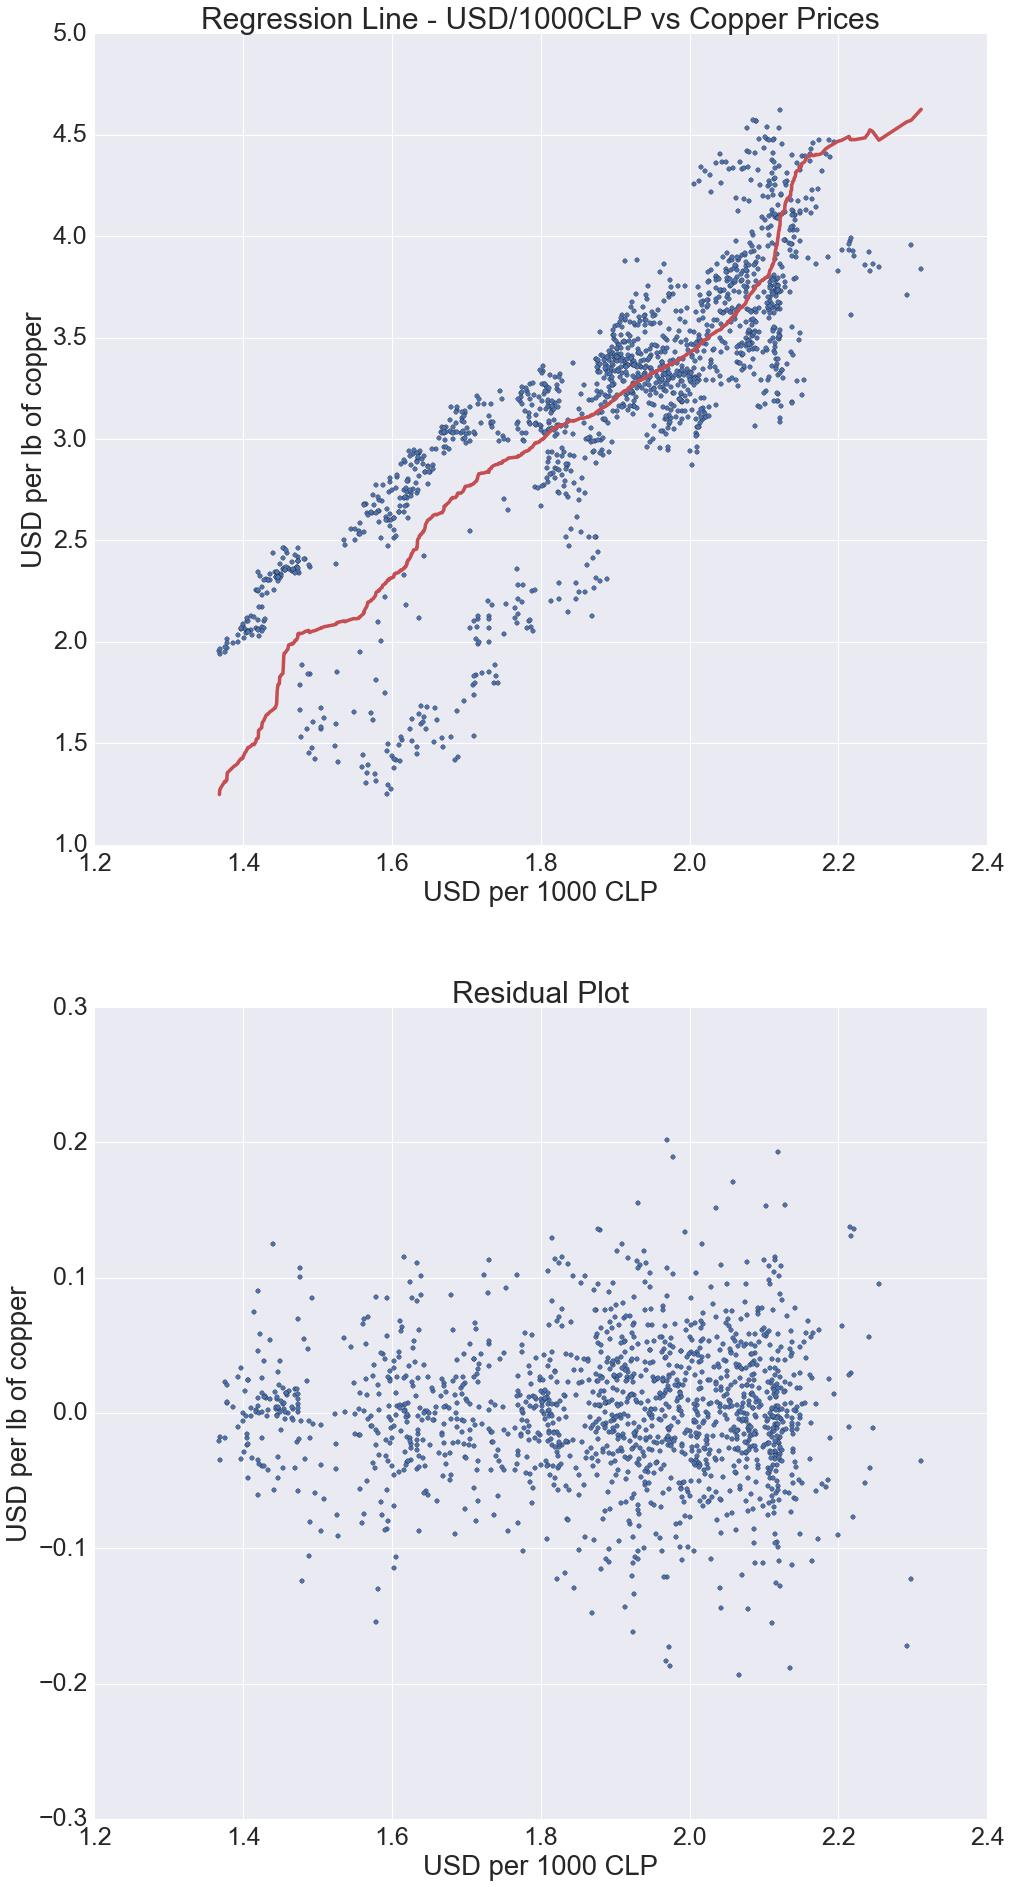

In [305]:
def PlotUnivariateFitAndResids(X, Y, preds, preds_sorted):

    dims = (16, 32)
    plt.subplots(figsize=dims)
    plt.subplot(2, 1, 1) 
    plt.scatter(np.ravel(X[:,0]), np.ravel(Y))
    plt.plot(np.sort(X[:,0], 0), preds_sorted, 'r', linewidth=3.5)
    plt.title("Regression Line - USD/1000CLP vs Copper Prices")
    plt.xlabel('USD per 1000 CLP')
    plt.ylabel('USD per lb of copper')

    plt.subplot(2, 1, 2)
    resid = np.ravel(Y) - preds
    plt.scatter(np.ravel(X[:,0]), resid)
    plt.title("Residual Plot")
    plt.xlabel('USD per 1000 CLP')
    plt.ylabel('USD per lb of copper')

    plt.savefig("lm2model.png")
    plt.show()

## fit linear regression model
def LinearRegressionFitAndPlot(X, Y):
    lm2 = LinearRegression()
    lm2.fit(X, Y)
    preds = lm2.predict(X)
    preds_sorted = lm2.predict(np.sort(X, 0))

    PlotUnivariateFitAndResids(X, Y, preds, preds_sorted)

LinearRegressionFitAndPlot(train_cu, train_labels_cu)

In [311]:
train_clp[1]

array([  3.17050000e+00,   2.09157685e+00,   2.11827159e+00,
         2.12195974e+00,   2.08582905e+00,   2.06484068e+00,
         3.16150000e+00,   3.22000000e+00,   3.32350000e+00,
         3.28350000e+00,   3.26100000e+00,   2.00800000e+03,
         1.00000000e+00])

In [310]:
lm = LinearRegression()
lm2 = LinearRegression()
lm.fit(train_clp, train_labels_clp)
lm2.fit(train_cu, train_labels_cu)


preds_clp = lm.predict(test_clp)
preds_cu = lm2.predict(test_cu)

residuals_clp = test_labels_clp - preds_clp
residuals_cu = test_labels_cu - preds_cu

mean_residual_clp = residuals_clp.mean()
std_residual_clp = residuals_clp.std()

mean_residual_cu = residuals_cu.mean()
std_residual_cu = residuals_cu.std()

print (mean_residual_clp)
print (std_residual_clp)
print (mean_residual_cu)
print (std_residual_cu)

0.000819161973555
0.0116306853922
-0.00412739802948
0.0541067577871


In [408]:

def trading(Daily_Money_at_Risk, Hedge_Ratio):

    
    m = Daily_Money_at_Risk
    h = Hedge_Ratio


    basket_clp = {'2007': [], '2008':[], '2009': [], '2010': [], '2011': [],'2012': [],
              '2013': [],'2014': [],'2015': [],'2016': []}

    basket_cu = {'2007': [], '2008':[], '2009': [], '2010': [], '2011': [],'2012': [],
              '2013': [],'2014': [],'2015': [],'2016': []}

    basket_usd = {'2007': [], '2008':[], '2009': [], '2010': [], '2011': [],'2012': [],
              '2013': [],'2014': [],'2015': [],'2016': []}



    for i in range (len(test_clp)):

        f_clp = abs((residuals_clp[i] - mean_residual_clp)/std_residual_clp)
        f_cu = abs((residuals_cu[i] - mean_residual_cu)/std_residual_cu)
        m_risk = m*f_clp      ### Trading money at risk at every transaction
        p_clp = test_labels_clp[i]  ### spot price USD/CLP
        p_cu = test_labels_cu[i]    ### spot price Copper
        year = str(int(test_clp[i][11]))         ### Capture year of transcation

        if residuals_clp[i] > 0:                ### CLP is stronger than predicted by model
            t_clp = - m_risk/p_clp  ### Sell CLP for USD
            t_cu = h*m_risk/p_cu       ### Buy Copper
            t_usd = m_risk - h*m_risk 
        else:
            t_clp = m_risk/p_clp      ### Buy CLP for USD
            t_cu = -h*m_risk/p_cu        ### Sell Copper
            t_usd = h*m_risk - m_risk

        basket_clp[year].append(t_clp)
        basket_cu[year].append(t_cu)
        basket_usd[year].append(t_usd)
    return((basket_clp, basket_cu, basket_usd))

In [397]:

print (list(prices.values())[100])
print (list(prices.keys())[100])

{'usd_per_1000clp': 1.8048427081113998, 'usd_per_lb_copper': 3.0305}
2014-06-13 00:00:00


In [398]:
end_price_clp = { }
end_price_cu = { }


dates = sorted(list(prices.keys()))
year = str(2007)

for i in range(len(dates)):
    current_year = str(int(datetime.date(dates[i]).year))
    if  current_year == year :
        continue
    else:
        end_price_clp[year] = prices[dates[i-1]]['usd_per_1000clp']
        end_price_cu[year] = prices[dates[i-1]]['usd_per_lb_copper']
        year = current_year
     

In [399]:
print(end_price_clp)

{'2011': 1.923621748245115, '2014': 1.650475485647708, '2010': 2.137616556000975, '2007': 2.0087270109178292, '2009': 1.970725103253826, '2008': 1.5674382140935015, '2012': 2.0882668027470412, '2013': 1.902715673587444, '2015': 1.4110794737372327}


In [400]:
print(end_price_cu)

{'2011': 3.4315, '2014': 2.8385, '2010': 4.4395, '2007': 3.0305, '2009': 3.3275, '2008': 1.395, '2012': 3.641, '2013': 3.4415, '2015': 2.1255}


In [424]:
def AssetValue(Daily_Money_at_Risk,Years_Sold):
    
    hedge_ratios = [ 0, 0.1, 0.25, 0.50, 0.75, 1]
    years = Years_Sold
    asset_values=[]
    for h in hedge_ratios:
        
        baskets = trading(Daily_Money_at_Risk, h)
        basket_clp = baskets[0]
        basket_cu = baskets[1]
        basket_usd = baskets[2]
        for year in years:
            usd = sum(basket_usd[year])
            clp = sum(basket_clp[year])*end_price_clp[year]
            cu = sum(basket_clp[year])*end_price_cu[year]
            nv = usd + clp + cu
            asset_values.append((int(year), nv, h))

    return asset_values



In [428]:
##years = ['2007', '2008', '2009', '2010', '2011','2012','2013','2014','2015']
years = ['2015']

In [429]:
data = pd.DataFrame(AssetValue(1, years), columns=['year', 'net_value','hedge_ratio']) 

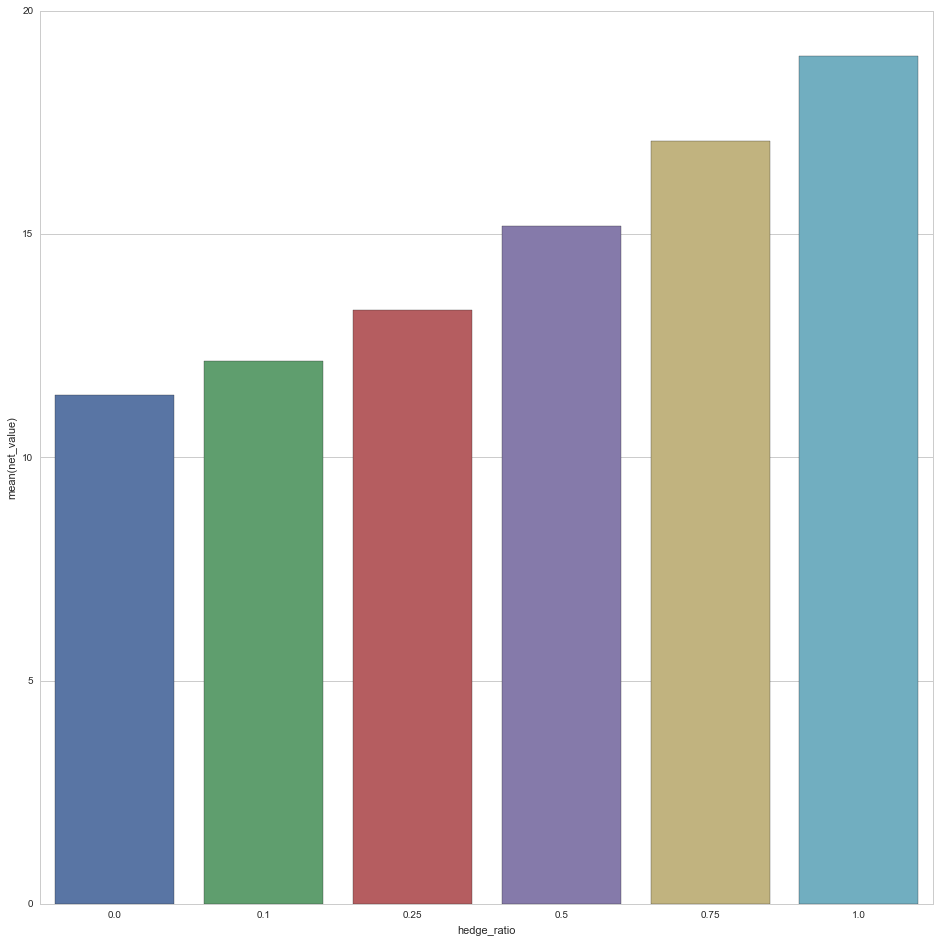

In [436]:
sns.set(font_scale=2.5)
sns.set(style="whitegrid", color_codes=True)
dims = (16, 16)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="hedge_ratio", y="net_value", data=data);
##sns.stripplot(x="hedge_ratio", y="net_value", data=data, jitter=True, size=10);
##sns.stripplot(x="year", y="net_value", data=data, jitter=True, hue="hedge_ratio", size=10);